##4.1 Building and Testing Helper Function:
1. Implementing Softmax Function:

In [1]:
import numpy as np

In [2]:
def softmax(z):
  """
  Compute the softmax of a 2D numpy array along the specified axis.
  Parameters:
  z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples

  and n is the number of classes.

  Returns:
  numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
  each row sums to 1 and represents the probability distribution
  over classes for a sample.

  Notes:
  - Applies a normalization trick to prevent numerical instability by subtracting
  the max value in each row before exponentiation.
  """
  # Normalize input to prevent numerical instability
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def test_softmax():
  """
  Perform basic assertion tests on the softmax function to validate its correctness.
  Tests:
  - Ensure that the output probabilities sum to 1 for each row.
  - Ensure non-negative values (all probabilities should be >= 0).
  - Test on edge cases (e.g., all zeros, very large or small values).
  """
  # Test input
  test_cases = [
  (np.array([[0, 0, 0]]), "All zeros"),
  (np.array([[1, 2, 3]]), "Simple case"),
  (np.array([[1000, 1000, 1000]]), "Large identical values"),
  (np.array([[-1000, -1000, -1000]]), "Small identical values"),
  (np.array([[1, 0, -1]]), "Mixed positive and negative")
  ]
  for i, (z, description) in enumerate(test_cases):
    print(f"Test {i + 1}: {description}")
    result = softmax(z)
    # Check that probabilities sum to 1
    assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"
    # Check non-negativity
    assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"
    print("Passed.")
  print("All tests passed for softmax function.")
test_softmax()

Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


2. Implementing Categorical Log-Loss Function:


In [5]:
# Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
  """
  Compute the cross-entropy loss for a single observation.
  Parameters:
  y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
  y_pred (numpy.ndarray): Predicted probabilities of shape (c,).
  Returns:
  float: Cross-entropy loss for the observation.
  """
  return -np.sum(y_true * np.log(y_pred + 1e-10)) # Add epsilon to prevent log(0)

In [6]:
def test_loss_softmax():
  """
  Test the loss_softmax function using a known input and output.
  """
  # Test Case 1: Perfect prediction
  y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.1, 0.8, 0.1]) # Predicted probabilities
  expected_loss = -np.log(0.8) # Expected loss for perfect prediction
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"

  # Test Case 2: Incorrect prediction
  y_true = np.array([1, 0, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.3, 0.4, 0.3]) # Predicted probabilities
  expected_loss = -np.log(0.3) # Expected loss for incorrect prediction
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"

  # Test Case 3: Edge case with near-zero probability
  y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.01, 0.98, 0.01]) # Predicted probabilities
  expected_loss = -np.log(0.98) # Expected loss for edge case
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"
  print("All test cases passed!")

# Run the test
test_loss_softmax()

All test cases passed!


In [7]:
def cost_softmax(X, y, W, b):
  """
  Compute the average cross-entropy cost over all samples.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  float: Average cross-entropy cost over all samples.
  """
  n, d = X.shape #n = number of rows and d = number of columns
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [8]:
def test_cost_softmax():
  """
  Test the cost_softmax function using a known input and output.
  """
  # Test Case 1: Small dataset with perfect predictions
  X = np.array([[1, 2], [2, 3], [3, 4]]) # Feature matrix (n=3, d=2)
  y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
  W = np.array([[1, -1], [-1, 1]]) # Weight matrix (d=2, c=2)
  b = np.array([0, 0]) # Bias vector (c=2)
  z = np.dot(X, W) + b
  y_pred = softmax(z) # Predicted probabilities
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"

  # Test Case 2: All-zero weights and bias
  X = np.array([[1, 0], [0, 1], [1, 1]]) # Feature matrix (n=3, d=2)
  y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
  W = np.zeros((2, 2)) # Zero weight matrix
  b = np.zeros(2) # Zero bias vector
  z = np.dot(X, W) + b
  y_pred = softmax(z) # Predicted probabilities (uniform distribution)
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"
  print("All test cases passed!")

# Run the test
test_cost_softmax()

All test cases passed!


##4. Implementing Gradient Descent for Training Softmax Regression:
#4.1 Gradients for Softmax Regression:

In [35]:
# Gradient Computation
def compute_gradient_softmax(X, y, W, b):
  """
  Compute the gradients of the cost function with respect to weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  tuple: Gradients with respect to weights (d, c) and biases (c,).
  """
  n, d = X.shape
  z = np.dot(X, W) + b #raw output scores (also known as logits) produced by the linear combination of input features, weights and biases
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n #gradient of w
  grad_b = np.sum(y_pred - y,axis=0)/n #gradient of b
  return grad_W,grad_b

In [37]:
# Test function
def test_compute_gradient_softmax():
  # Define simple inputs
  X = np.array([[1, 2], [3, 4]]) # Shape (2, 2)
  y = np.array([[1, 0], [0, 1]]) # Shape (2, 2), one-hot encoded
  W = np.array([[0.1, 0.2], [0.3, 0.4]]) # Shape (2, 2)
  b = np.array([0.01, 0.02]) # Shape (2,)

  # Expected gradients (calculated manually or using a reference implementation)
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
  grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

  # Compute gradients using the function
  grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

  # Assertions
  assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
  assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"
  print("All tests passed for compute_gradient_softmax!")
# Run the test
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


#4.2 Gradient Descent for Softmax Regression:

In [11]:
# Gradient Descent
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  """
  Perform gradient descent to optimize the weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  alpha (float): Learning rate.
  n_iter (int): Number of iterations.
  show_cost (bool): Whether to display the cost at intervals.
  Returns:
  tuple: Optimized weights, biases, and cost history.
  """
  cost_history = [] #an empty list to store cost for each iteration
  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W #computing updated value of w
    b -= alpha * grad_b #computing updated value of b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost) #appending the cost obtained from cost function to cost history
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
  return W, b, cost_history

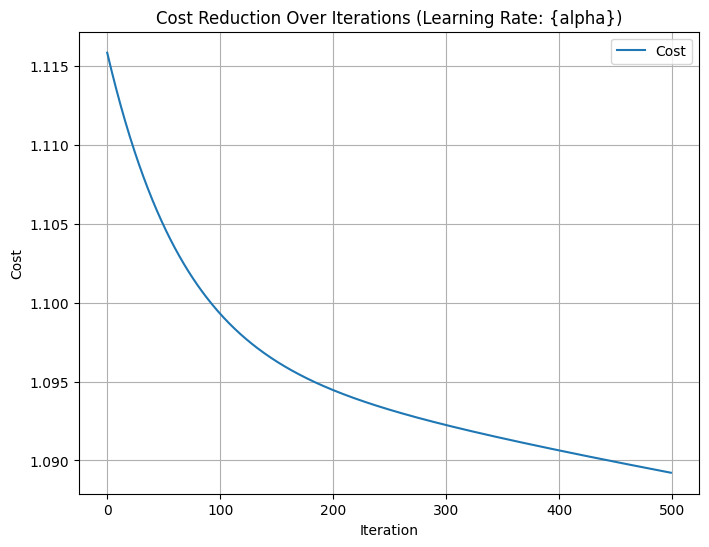

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [12]:
# To test a Gradient Descent we plot the Cost vs. Iterations and observe the behaviour and flow of the plot.
import matplotlib.pyplot as plt
def test_gradient_descent_softmax_with_plot():
  # Generate synthetic data for testing
  np.random.seed(0)
  n, d, c = 100, 5, 3 # 100 samples, 5 features, 3 classes
  X = np.random.rand(n, d)
  y_indices = np.random.randint(0, c, size=n)
  y = np.zeros((n, c))
  y[np.arange(n), y_indices] = 1 # One-hot encoding

  # Initialize weights and biases
  W = np.random.rand(d, c)
  b = np.random.rand(c)

  # Parameters for gradient descent
  alpha = 0.01 # Learning rate
  n_iter = 500 # Number of iterations

  # Run gradient descent
  W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

  # Plot the cost history
  plt.figure(figsize=(8, 6))
  plt.plot(range(n_iter), cost_history, label="Cost")
  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.title("Cost Reduction Over Iterations (Learning Rate: {alpha})")
  plt.legend()
  plt.grid()
  plt.show()

  # Final cost should ideally be less than initial cost
  print(f"Initial Cost: {cost_history[0]}")
  print(f"Final Cost: {cost_history[-1]}")

test_gradient_descent_softmax_with_plot()

##5. Decision/Prediction Function for Softmax Regression for Multi-class Classification:

In [13]:
# Prediction Function
def predict_softmax(X, W, b):
  """
  Predict the class labels for input data.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n, d).
  W (numpy.ndarray): Weight matrix of shape (d, c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  numpy.ndarray: Predicted class labels of shape (n,).
  """
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return np.argmax(y_pred, axis=1) #pick the index of the highest probability in each row

In [14]:
def test_predict_softmax():
  # Generate synthetic data for testing
  np.random.seed(0)
  n, d, c = 10, 5, 3 # 10 samples, 5 features, 3 classes
  X = np.random.rand(n, d)
  W = np.random.rand(d, c)
  b = np.random.rand(c)

  # Compute the predictions using the function
  predictions = predict_softmax(X, W, b)

  # Check the shape of the output
  assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"

  # Verify that all predicted labels are within the range of class indices
  assert np.all(predictions >= 0) and np.all(predictions < c), (f"Predictions out of range: expected 0 to {c-1}, got {predictions}")

  # Check that the predicted labels are integers
  assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"
  print("All tests passed for predict_softmax!")
# Run the test
test_predict_softmax()

All tests passed for predict_softmax!


##7. Evaluating Classifier:

In [15]:
# Evaluation Function
def evaluate_classification(y_true, y_pred):
  """
  Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
  Parameters:
  y_true (numpy.ndarray): True class labels of shape (n,).
  y_pred (numpy.ndarray): Predicted class labels of shape (n,).
  Returns:
  tuple: Confusion matrix, precision, recall, and F1-score.
  """
  from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
  cm = confusion_matrix(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
  recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
  f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
  return cm, precision, recall, f1

##4.2 Putting Helper Function to Action - Softmax Regression for the dataset:

Dataset Used: "titanic.csv"
1. Some Basic Data Operation, Loading, Analysis and Cleaning:

In [16]:
import pandas as pd

In [17]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")

In [18]:
#displaying information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
#Calculating the rows and columns of the dataframe
df.shape

(891, 12)

2. Constructing One Hot Encoding for Label Vector:

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Data cleaning
#Filling the null values of Age column with mean of the column
df['Age'] = df['Age'].fillna(df['Age'].mean())

#Filling the null values of Embarked column with the first value that is mostly repeated
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Gender' column
df[['Female', 'Male']] = encoder.fit_transform(df[['Sex']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


In [23]:
#Selecting columns for feature matrix
X=np.array(df[['Pclass', 'Female', 'Male', 'Age', 'SibSp', 'Parch', 'Fare']])

#Selecting column for target variable
y=np.array(df['Embarked'])

#Fit and transform the target variable (y) to one-hot encoded format
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
print(y_onehot)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


3. Train Test Split and Standard Scaling of the Data:

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assertions to check the shape of X_train_scaled and X_test_scaled
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {X_test_scaled.shape}"
print("Shape assertions passed!")

Shape assertions passed!


4. Training of the Softmax Regression:

In [27]:
# Intitalizations:
#number of classes
num_classes = y_train.shape[1]

#number of features
num_features = X_train_scaled.shape[1]

#W is the weight matrix that stores the learned weights for each feature and class.
W = np.zeros((num_features, num_classes))

#bias vector, one bias for each class
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000

In [28]:
#Train model
print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)


Training Softmax Regression Model:
Iteration 0: Cost = 1.070320
Iteration 100: Cost = 0.689603
Iteration 200: Cost = 0.677599
Iteration 300: Cost = 0.673091
Iteration 400: Cost = 0.670773
Iteration 500: Cost = 0.669421
Iteration 600: Cost = 0.668574
Iteration 700: Cost = 0.668015
Iteration 800: Cost = 0.667634
Iteration 900: Cost = 0.667367
Iteration 999: Cost = 0.667176


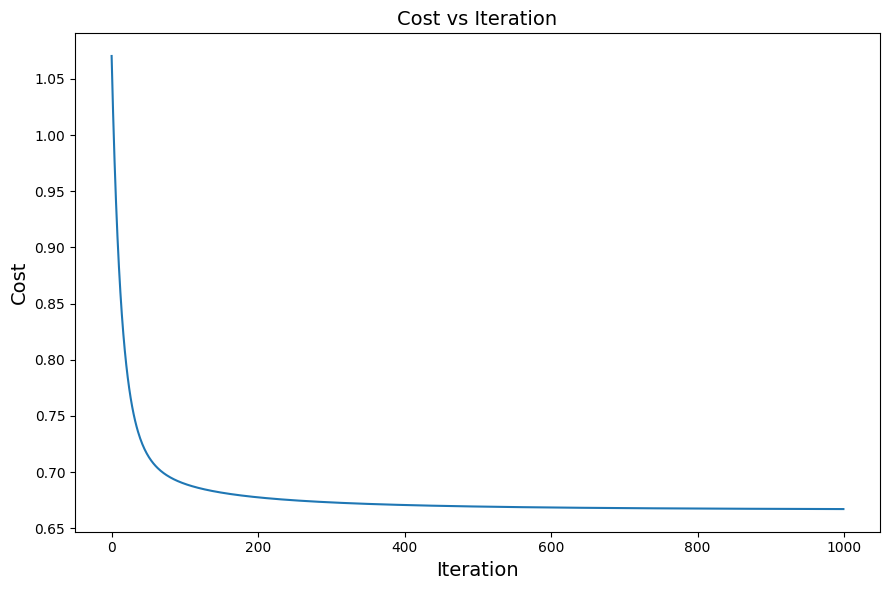

In [29]:
#Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()
plt.show()

4. Did the Model Overfitt or Underfitt?

In [30]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.6672
Test Loss (Cost): 0.7079


5. How well my model did?

In [31]:
# Convert one-hot encoded y_test to class indices
y_test_true = np.argmax(y_test, axis=1)

# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Test Accuracy: 73.18%

Confusion Matrix:
[[  4   0  30]
 [  0   0  15]
 [  3   0 127]]
Precision: 0.64
Recall: 0.73
F1-Score: 0.65


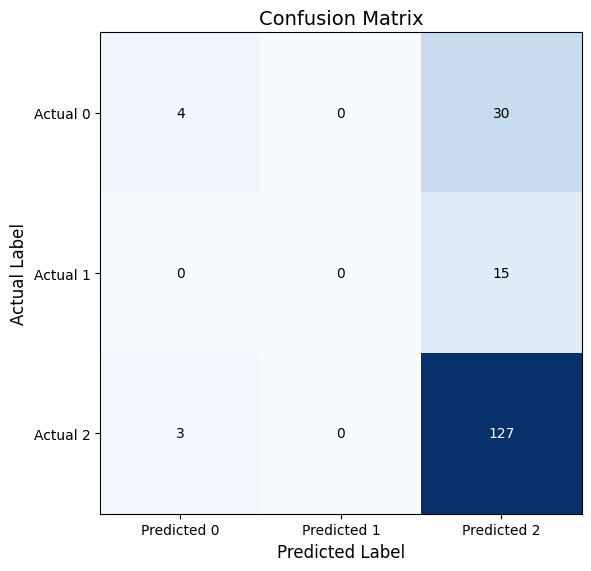

In [32]:
#Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues') # Use a color map for better visualization
# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2'])
# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()